In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras
from keras.utils import np_utils
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K

In [2]:
''' reading fashion mnist data from tensorflow ''' 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)


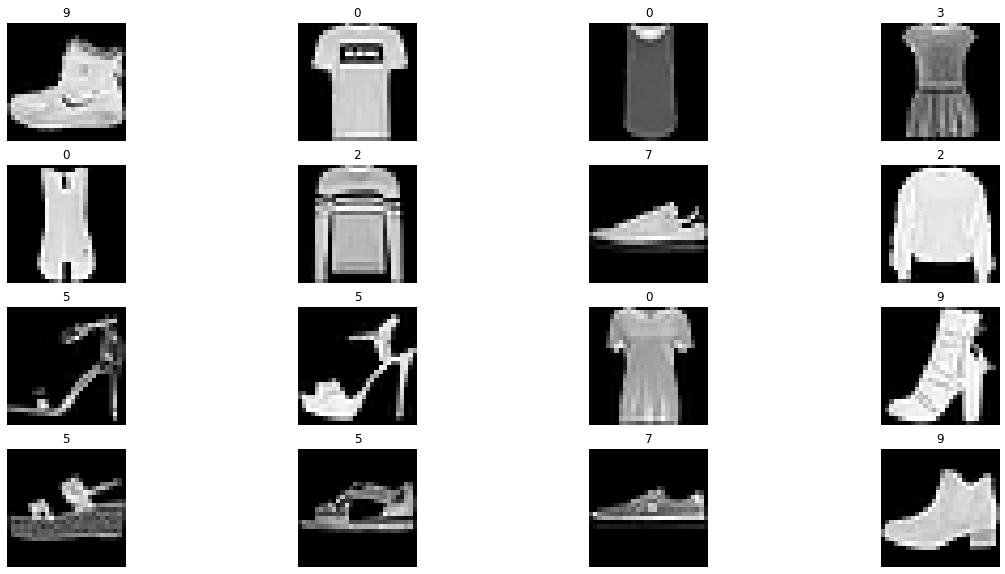

In [4]:
''' plotting some images '''
plt.figure(figsize=(20, 10))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i], cmap='gray')
  plt.title(y_train[i])

plt.show()

In [5]:
''' preprocessing steps ''' 

''' number of rows and columns '''
rows = X_train[0].shape[0]
cols = X_train[1].shape[0]

''' reshaping X_train and X_test '''
X_train = X_train.reshape(X_train.shape[0], rows, cols, 1)
X_test = X_test.reshape(X_test.shape[0], rows, cols, 1)

'''Storing the shape of a single image '''
inp_shape = (rows, cols, 1)

''' changing data type '''
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

'''  rescaling ''' 
X_train = X_train / 255
X_test = X_test / 255

''' converting labels into to_categorical ''' 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

''' Number of classes '''
num_cls = y_test.shape[1]
num_pix = X_train.shape[1] * X_train.shape[2]

In [6]:
num_cls

10

In [7]:
''' Model ''' 

''' container '''
model = Sequential()

''' Convolutional Layer '''
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inp_shape))
model.add(BatchNormalization())

''' Convolutional Layer '''
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

''' MaxPooling Layer ''' 
model.add(MaxPooling2D(pool_size=(2, 2)))

''' Dropout ''' 
model.add(Dropout(0.25))
model.add(Flatten())

''' Hidden Layers ''' 
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
''' Classification Layer ''' 
model.add(Dense(num_cls, activation='softmax'))

In [8]:
''' Compile the model ''' 
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adadelta(), metrics = ['accuracy'])

In [9]:
''' lets see how model looks like '''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0

In [10]:
''' training '''

batch_size = 128
epochs = 100 

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
469/469 [==============================] - 38s 19ms/step - loss: 2.6245 - accuracy: 0.2565 - val_loss: 1.6990 - val_accuracy: 0.4028
Epoch 2/100
469/469 [==============================] - 8s 18ms/step - loss: 1.5944 - accuracy: 0.4960 - val_loss: 0.9022 - val_accuracy: 0.6858
Epoch 3/100
469/469 [==============================] - 8s 18ms/step - loss: 1.2626 - accuracy: 0.5959 - val_loss: 0.7744 - val_accuracy: 0.7282
Epoch 4/100
469/469 [==============================] - 8s 18ms/step - loss: 1.0935 - accuracy: 0.6448 - val_loss: 0.7011 - val_accuracy: 0.7532
Epoch 5/100
469/469 [==============================] - 8s 18ms/step - loss: 0.9924 - accuracy: 0.6783 - val_loss: 0.6540 - val_accuracy: 0.7709
Epoch 6/100
469/469 [==============================] - 8s 18ms/step - loss: 0.9268 - accuracy: 0.6954 - val_loss: 0.6192 - val_accuracy: 0.7813
Epoch 7/100
469/469 [==============================] - 8s 18ms/step - loss: 0.8732 - accuracy: 0.7118 - val_loss: 0.5941 - val_accuracy

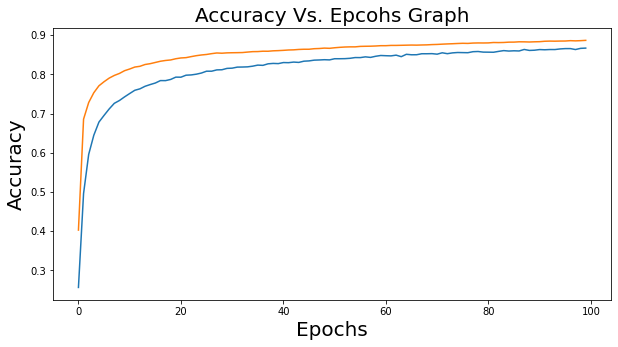

In [12]:
''' training accuracy and validation accuracy graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title("Accuracy Vs. Epcohs Graph", fontsize=20);

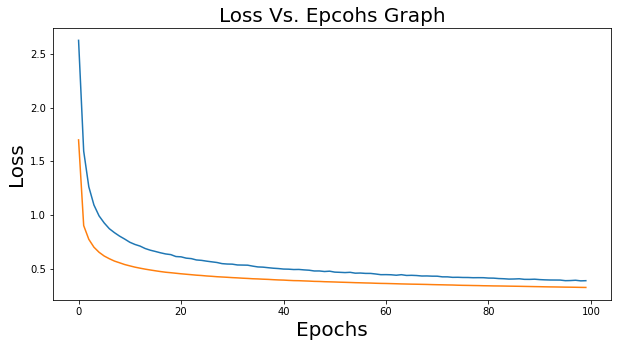

In [13]:
''' training loss and validation loss graph '''

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Accuracy')
plt.plot(history.history['val_loss'], label='Val Accuracy')
plt.xlabel('Epochs', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title("Loss Vs. Epcohs Graph", fontsize=20);

In [18]:
''' prediction '''
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)

In [29]:
''' resizing y_test '''
test = []
for x in y_test:
  if 1 in x:
    x = list(x)
    test.append(x.index(1))

In [36]:
y_test = np.array(test)

In [37]:
print("Accuracy Score: ", accuracy_score(y_test, pred))

Accuracy Score:  0.8868
